In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

from collections import Counter

In [2]:
# Importing the dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],columns=iris['feature_names']+['target'])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [3]:
# Describing the dataset
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [4]:
# Split the dataset into x and y
x = iris_df.iloc[:,:-1]
y = iris_df.iloc[:,-1]

In [5]:
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

In [7]:
# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

x_test = np.asarray(x_test)
y_test = np.asarray(y_test)


In [8]:
print(f'training set size: {x_train.shape[0]} samples \ntest set size: {x_test.shape[0]} samples')

training set size: 120 samples 
test set size: 30 samples


In [10]:
# Normalizing the data
scaler = Normalizer().fit(x_train)
normalized_x_train = scaler.transform(x_train)
normalized_x_test = scaler.transform(x_test)

In [11]:
print('x train before Normalization: \n', x_train[0:5])
print('\nx train after Normalization: \n', normalized_x_train[0:5])

x train before Normalization: 
 [[6.4 3.1 5.5 1.8]
 [5.4 3.  4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [6.1 3.  4.9 1.8]
 [6.4 2.8 5.6 2.2]]

x train after Normalization: 
 [[0.69804799 0.338117   0.59988499 0.196326  ]
 [0.69333409 0.38518561 0.57777841 0.1925928 ]
 [0.80641965 0.54278246 0.23262105 0.03101614]
 [0.71171214 0.35002236 0.57170319 0.21001342]
 [0.69417747 0.30370264 0.60740528 0.2386235 ]]


Text(0.5, 1.08, 'After Normalization')

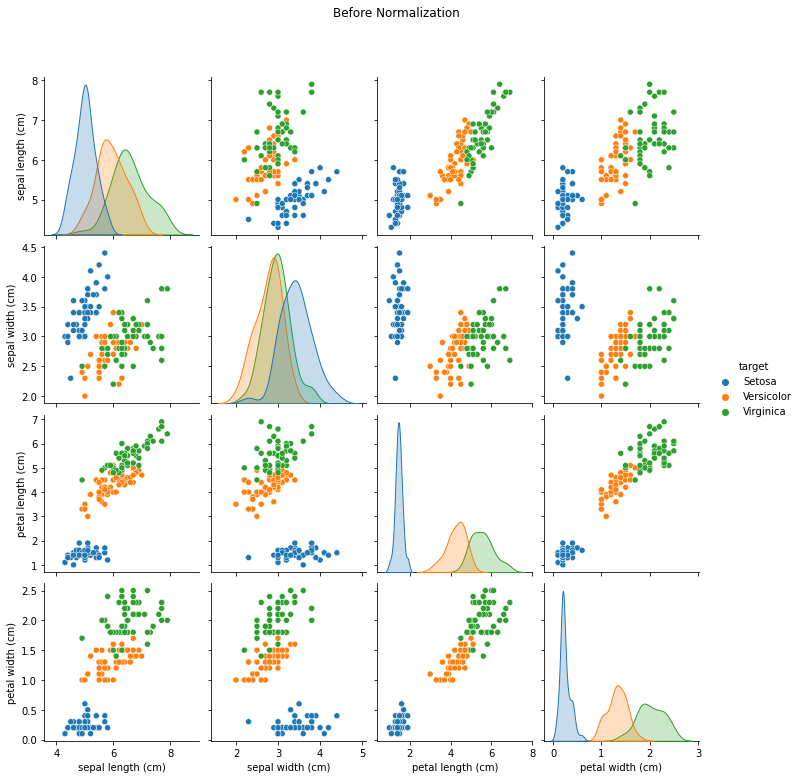

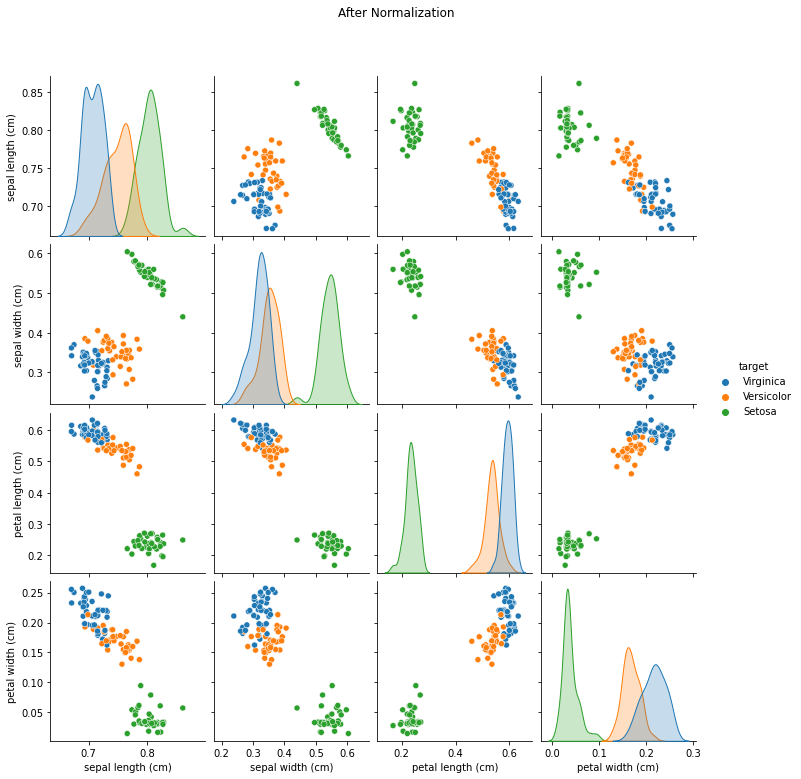

In [12]:
# Visualizing the data before and after normalization
#Before normalization
di = {0.0: 'Setosa', 1.0: 'Versicolor', 2.0: 'Virginica'}

before = sns.pairplot(iris_df.replace({'target': di}), hue='target', vars=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])
before.fig.suptitle('Before Normalization',y=1.08)

#After normalization
iris_df_2 = pd.DataFrame(data=np.c_[normalized_x_train, y_train],columns=iris['feature_names']+['target'])
di = {0.0: 'Setosa', 1.0: 'Versicolor', 2.0: 'Virginica'}
after = sns.pairplot(iris_df_2.replace({'target': di}), hue='target', vars=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])
after.fig.suptitle('After Normalization',y=1.08)


In [13]:
# KNN Step1 (Euclidean Distance)
def distance_ecu(x_train, x_test_point):
    """
    Input:
    - x_train: training set
    - x_test_point: test point
    Output:
    - distance: distance between x_test_point and x_train
    """
    distances = []
    for row in range(len(x_train)):
        current_train_point = x_train[row]
        current_distance = 0

        for col in range(len(current_train_point)):
            current_distance += (current_train_point[col] - x_test_point[col])**2
        
        current_distance = np.sqrt(current_distance)
        distances.append(current_distance)

# Store distance in a dataframe
    distances  = pd.DataFrame(data=distances, columns=['distance'])
    return distances




In [14]:
# KNN step2 (Find the nearest neighbors)
def nearest_neighbour(distance_point, K):
    """
    Input:
    - distance_point: distance between x_test_point and x_train
    - K: number of nearest neighbors
    Output:
    - nearest_neighbors: the K nearest neighbors
    """
    # Sort the distance_point
    df_nearest = distance_point.sort_values(by='distance', axis=0, ascending=True)

    # Get the K nearest neighbors
    df_nearest = df_nearest[:K]
    return df_nearest


In [15]:
# KNN step3 (Find the class point based on the majority vote)
def voting(def_nearest, y_train):
    """
    Input:
    - def_nearest: the K nearest neighbors
    - y_train: training set
    Output:
    - voting_result: the class point based on the majority vote
    """
    # Get the class point based on the majority vote
    counter_vote = Counter(y_train[def_nearest.index])

    y_pred = counter_vote.most_common()[0][0]
    return y_pred

In [16]:
# KNN Full algorithm: Put all together
def KNN_from_scratch(x_train, y_train, x_test, K):
    """
    Input:
    - x_train: training set
    - y_train: training set
    - x_test: full test dataset
    - K: number of nearest neighbors
    Output:
    - y_pred: the class point based on the majority vote
    """
   
    y_pred = []

    # Loop through each test point
    for x_test_point in x_test:
        # Calculate the distance between x_test_point and x_train
        distance_point = distance_ecu(x_train, x_test_point)
        # Find the nearest neighbors
        def_nearest_point = nearest_neighbour(distance_point, K)
        # Find the class point based on the majority vote
        y_pred.append(voting(def_nearest_point, y_train))


    return y_pred

In [18]:
# Test the algorithm on the test set
K=3
y_predict_scratch = KNN_from_scratch(normalized_x_train, y_train, normalized_x_test, K)
print('\nPredicted class: \n', y_predict_scratch)


Predicted class: 
 [2.0, 1.0, 0.0, 2.0, 0.0, 2.0, 0.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 2.0, 0.0, 0.0, 2.0, 1.0, 0.0, 0.0, 2.0, 0.0, 0.0, 1.0, 1.0, 0.0]


In [19]:
# Compare the predicted class with the actual class
knn = KNeighborsClassifier(K)
knn.fit(normalized_x_train, y_train)
y_pred_sklearn = knn.predict(normalized_x_test)
print('\nPredicted class: \n', y_pred_sklearn)


Predicted class: 
 [2. 1. 0. 2. 0. 2. 0. 1. 1. 1. 2. 1. 1. 1. 1. 0. 1. 2. 0. 0. 2. 1. 0. 0.
 2. 0. 0. 1. 1. 0.]


In [21]:
# Check if the predicted class is the same as the actual class
print(np.array_equal(y_pred_sklearn, y_predict_scratch))

True


In [22]:
# Calculate accuracy of both the classifiers
print(f'\nAccuracy of KNN from scratch: {accuracy_score(y_test, y_predict_scratch)*100}%')
print(f'\nAccuracy sklearn implementation: {accuracy_score(y_test, y_pred_sklearn)*100}%')


Accuracy of KNN from scratch: 96.66666666666667%

Accuracy sklearn implementation: 96.66666666666667%


In [23]:
# Perform Hypberparameter tuning using K-fold cross validation
n_splits = 4
kf = KFold(n_splits=n_splits)
accuracy_k = []
k_values = list(range(1,30,2))

for k in k_values:
    accuracy_fold = 0
    for normalized_x_train_fold_idx, normalized_x_valid_fold_idx in kf.split(normalized_x_train):
        normalized_x_train_fold = normalized_x_train[normalized_x_train_fold_idx]
        y_train_fold = y_train[normalized_x_train_fold_idx]

        normalized_x_test_fold = normalized_x_train[normalized_x_valid_fold_idx]
        y_valid_fold = y_train[normalized_x_valid_fold_idx]
        y_pred_fold = KNN_from_scratch(normalized_x_train_fold, y_train_fold, normalized_x_test_fold, k)
        accuracy_fold += accuracy_score(y_valid_fold, y_pred_fold)
    
    accuracy_fold = accuracy_fold/n_splits
    accuracy_k.append(accuracy_fold)

In [24]:
print(f'\nAccuracy for each K value was: {list(zip(k_values, accuracy_k))}')



Accuracy for each K value was: [(1, 0.9666666666666668), (3, 0.9666666666666668), (5, 0.9666666666666668), (7, 0.9666666666666668), (9, 0.9583333333333333), (11, 0.9583333333333333), (13, 0.9583333333333334), (15, 0.95), (17, 0.9583333333333333), (19, 0.9583333333333333), (21, 0.9583333333333333), (23, 0.9583333333333333), (25, 0.9583333333333333), (27, 0.9583333333333333), (29, 0.9583333333333333)]


In [25]:
print(f'\nBest accuracy was {np.max(accuracy_k)}, which corresponds to K = {k_values[np.argmax(accuracy_k)]}')


Best accuracy was 0.9666666666666668, which corresponds to K = 1
